# **Predicting the Number of Marriages in Swiss Cantons in Different Age Groups from 1981-2024 Onwards**


This is the first file, documenting our approach before the "Final Version (Clean) Marriages" file.

**Assumptions in our project:**

- We are predicting the number of marriages in a specific canton in a specific age group. In the context of our business solution, we are in fact interested in the number of weddings occurring, therefore, we assume that most marriages will have a wedding.

- We assume that marriages take time to materialize, therefore, in order to predict the number of marriages in a specific year 'Y' (e.g. 2017), we use inputs from the year 'Y-2' (e.g. 2015).

**Problem Being Solved and Business Implications**

Target Client for the Data App: **Wedding Planners**

Problem/Topic: **Predicting the Number of Marriages in Swiss Cantons in Different Age Groups from 1981-2024 Onwards**

The wedding industry is a complex and interconnected industry involving multiple sectors such as fashion, catering, entertainment, tourism, technology and marketing. Its functioning depends on the ability to plan and forecast the number of weddings planned to optimize resource allocation, venue availability management and coordination with suppliers. One crucial aspect is the reduction of booking and organizing time, considering that modern couples require quick and personalized service. Although a lot of research and preparation is required to plan a wedding, booking times are getting shorter and many couples want to visualize their dream in a short period of time. Therefore, wedding planners need to work more efficiently in order to arrange more and more weddings in less and less time.
In this context, the need to analyze the marriage market on a regional (by canton) and demographic (by age group) basis emerges. Each canton has unique characteristics in terms of culture, traditions, and demand. Therefore, a regional analysis of the number of marriages performed makes it possible to:
-	Customize offerings: tailor services to the prevailing traditions and tastes in each area.
-	Leverage local suppliers: collaborate with suppliers in the area for catering, decorations or other services, improving logistical efficiency and reducing costs.
-	Focus on high-demand areas: identify cantonments with a high number of weddings to focus marketing and operational efforts.

Equally important is the analysis of data by age group, as it allows wedding planners to:
-	Adapt the offer: age groups can influence the type of services requested, such as specific entertainment, photography etc. For example, young couples may prefer weddings that follow trends, while more mature couples may opt for more traditional options.
-	Develop targeted marketing: by knowing the prevailing age of couples, you can create advertising campaigns that speak directly to their preferences and needs, improving the effectiveness of promotions.
The availability and capacity of locations, especially during peak season (May to September) and on Saturday days, are additional operational constraints to consider. Therefore, the ability to predict and analyze these variables can improve operational effectiveness, service customization, and marketing strategies.


# **Data Handling**

In [ ]:
from google.colab import drive
import pandas as pd
from datetime import datetime

drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/Business Analytics und Data Science/BA2/"

Mounted at /content/drive


**Marriages Data**

First we select only the rows that are broken down into age ranges(are not total - _T). Then we convert the age ranges to match the age groups we have defined. This means that all the rows in with age group 20-24 and 25-29 they will all be converted to 20-29. Then we select only the rows where the age groups match, so we get just one marriage value per age group per canton. We also exclude the nationwide data (!= CH), because we only want canton data. Then we change the name of the cantons to match the ones we define in canton_mapping. Finally we group and add up the marrgies per age group because ,as we mentioned, for one current age group there are multiples values due to the previous smaller age groups.

In [ ]:
marriages = pd.read_csv(path + "marriages.csv")
marriages = marriages[
    ~marriages['AGE_PARTNER1'].isin(['_T', 'YB0']) &
    ~marriages['AGE_PARTNER2'].isin(['_T', 'YB0'])
]

# Update AGE groups to be in 10-year intervals
age_intervals = {
    'Y0T4': '0-9',
    'Y5T9': '0-9',
    'Y10T14': '10-19',
    'Y15T19': '10-19',
    'Y20T24': '20-29',
    'Y25T29': '20-29',
    'Y30T34': '30-39',
    'Y35T39': '30-39',
    'Y40T44': '40-49',
    'Y45T49': '40-49',
    'Y50T54': '50-59',
    'Y55T59': '50-59',
    'Y60T64': '60-69',
    'Y65T69': '60-69',
    'Y70T74': '70-79',
    'Y75T79': '70-79',
    'Y80T84': '80-89',
    'Y85T89': '80-89',
    'Y_GE90': '90-99'
}

marriages['AGE_PARTNER1'] = marriages['AGE_PARTNER1'].map(age_intervals)
marriages['AGE_PARTNER2'] = marriages['AGE_PARTNER2'].map(age_intervals)

marriages = marriages[
    (marriages['AGE_PARTNER1'] == marriages['AGE_PARTNER2']) &  # Matching age groups
    (marriages['CANTON'] != 'CH')  # Exclude canton CH
]

marriages['AGE_GROUP'] = marriages['AGE_PARTNER1']
marriages = marriages.drop(columns=['AGE_PARTNER1', 'AGE_PARTNER2'])

canton_mapping = {
    '1': 'Zürich',
    '2': 'Bern / Berne',
    '3': 'Luzern',
    '4': 'Uri',
    '5': 'Schwyz',
    '6': 'Obwalden',
    '7': 'Nidwalden',
    '8': 'Glarus',
    '9': 'Zug',
    '10': 'Fribourg / Freiburg',
    '11': 'Solothurn',
    '12': 'Basel-Stadt',
    '13': 'Basel-Landschaft',
    '14': 'Schaffhausen',
    '15': 'Appenzell Ausserrhoden',
    '16': 'Appenzell Innerrhoden',
    '17': 'St. Gallen',
    '18': 'Graubünden / Grigioni / Grischun',
    '19': 'Aargau',
    '20': 'Thurgau',
    '21': 'Ticino',
    '22': 'Vaud',
    '23': 'Valais / Wallis',
    '24': 'Neuchâtel',
    '25': 'Genève',
    '26': 'Jura'
}

# Apply the mapping to the canton column
marriages['CANTON'] = marriages['CANTON'].replace(canton_mapping)
marriages = marriages.rename(columns={'YEAR': 'Year', 'CANTON': 'Canton', 'AGE_GROUP': 'Age Group','OBS_VALUE': 'marriages'})

marriages = marriages.groupby(['Year', 'Canton', 'Age Group'])['marriages'].sum().reset_index()

marriages.head()

<ipython-input-2-f3dcd83965d0>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marriages['AGE_GROUP'] = marriages['AGE_PARTNER1']


,Year,Canton,Age Group,marriages
0,1969,Aargau,10-19,14
1,1969,Aargau,20-29,2078
2,1969,Aargau,30-39,109
3,1969,Aargau,40-49,37
4,1969,Aargau,50-59,32


**Births Data**

First, we select all the rows that are not nationwide (!= CH), only the rows that are broken down into age ranges (!= _T) and the rows are broken down by the sex of the child(!= T). Then we convert the age ranges to match the age groups we previously defined and do the same to the cantons. Then we group the age groups together because when we changed them to match our age groups, if we had age of the mother 10-14 for one row, and 15-19 for another row, this would all be 10-19, so we sum them up. Then we turn the SEX_CHILD column into two columns Births_Female, and Births_Male.

In [ ]:
births = pd.read_csv(path + "Births_Canton.csv")
births = births[(births['CANTON'] != 'CH') &(births['AGE_MOTHER'] != '_T') & (births['SEX_CHILD'] != 'T')]
births['AGE_MOTHER'] = births['AGE_MOTHER'].map(age_intervals)
births['CANTON'] = births['CANTON'].replace(canton_mapping)
births = births.rename(columns={'YEAR': 'Year', 'CANTON': 'Canton', 'AGE_MOTHER': 'Age Group','OBS_VALUE': 'Births'})
births = births.groupby(['Year', 'Canton', 'Age Group', 'SEX_CHILD'])['Births'].sum().reset_index()
births = births.pivot(index=['Year', 'Canton', 'Age Group'], columns='SEX_CHILD', values='Births').reset_index()
births = births.rename(columns={'F': 'Births_Female', 'M': 'Births_Male'})
births.head()

SEX_CHILD,Year,Canton,Age Group,Births_Female,Births_Male
0,1969,Aargau,10-19,186,181
1,1969,Aargau,20-29,2480,2572
2,1969,Aargau,30-39,1146,1157
3,1969,Aargau,40-49,117,140
4,1969,Aargau,50-59,0,0


**Citizenship Acquisition Data**

In [ ]:
cit = pd.read_csv(path + "citizenshipAcquisition.csv", encoding='latin1')

cit['Age'] = cit['Age'].str.extract(r'(\d+)').astype(int)

# Define age group intervals
def convertAgeGroup(df, name="Age"):
  bins = list(range(0, 120, 10))  # 0-9, 10-19, 20-29, etc.
  labels = [f"{i}-{i + 9}" for i in bins[:-1]]
  return pd.cut(df[name], bins=bins, labels=labels, right=False)

cit['Age Group'] = convertAgeGroup(cit)

# Group by "Year", "Canton", and "Age Group" and sum up the acquisitions
citizenhip = cit.groupby(['Year', 'Canton', 'Age Group', 'Sex'], as_index=False)['Acquisition of Swiss citizenship'].sum()

citizenhip.head()

<ipython-input-4-fc87f2b5e317>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  citizenhip = cit.groupby(['Year', 'Canton', 'Age Group', 'Sex'], as_index=False)['Acquisition of Swiss citizenship'].sum()


,Year,Canton,Age Group,Sex,Acquisition of Swiss citizenship
0,2011,Aargau,0-9,Female,94
1,2011,Aargau,0-9,Male,115
2,2011,Aargau,10-19,Female,189
3,2011,Aargau,10-19,Male,185
4,2011,Aargau,20-29,Female,157


Despite processing the above data, we decided to exclude it from the final model. This is because we believed that people might acquire Swiss citizenship from getting married, and not solely get married because of acquiring Swiss citizenship. This could lead the target variable (number of marriages) to affect this independent variable (Acquisition of Swiss citizenship) which could result in inflated performance or errors later on in the model.

**Divorces Data**

We first select the columns where the ages groups of both partners match (e.g 20-29 with 20-29). Then we rename the columns so they match the age group name of the other data frames. Finally we use pd.melt to turn the data from wide format to long format, meaning, we turn the age group columns to rows in a new Age Group column.

In [ ]:
divorces = pd.read_csv(path + "divorcesExtended.csv", encoding='latin1')
divorces.head()

,Year,Canton,Less than 20 years Less than 20 years,Less than 20 years 20-29 years,Less than 20 years 30-39 years,Less than 20 years 40-49 years,Less than 20 years 50-59 years,Less than 20 years 60-69 years,Less than 20 years 70-79 years,Less than 20 years 80-89 years,...,80-89 years 90 years or more,90 years or more Less than 20 years,90 years or more 20-29 years,90 years or more 30-39 years,90 years or more 40-49 years,90 years or more 50-59 years,90 years or more 60-69 years,90 years or more 70-79 years,90 years or more 80-89 years,90 years or more 90 years or more
0,1969,Zürich,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1969,Bern / Berne,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1969,Luzern,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1969,Uri,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1969,Schwyz,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
matching_columns = [
    col for col in divorces.columns
    if " ".join(col.split()[:2]) == " ".join(col.split()[-2:])
]

matching_columns.insert(2, "Less than 20 years Less than 20 years")

divorces = divorces[matching_columns]

def extract_age_group(col):
    if col == "Less than 20 years Less than 20 years":
        return "10-19"  # Rename this specific case
    parts = col.split()  # Split the column name by spaces
    if len(parts) >= 2 and parts[:2] == parts[-2:]:  # Check if the age groups match
        return " ".join(parts[:2]).replace("years", "").strip()  # Return the first age group without "years"
    return col  # Return original column name if no match

# Rename columns
divorces.columns = [extract_age_group(col) for col in divorces.columns]
divorces = pd.melt(divorces, id_vars=['Year', 'Canton'], var_name='Age Group', value_name='Divorces')


divorces.head()

,Year,Canton,Age Group,Divorces
0,1969,Zürich,10-19,0
1,1969,Bern / Berne,10-19,0
2,1969,Luzern,10-19,0
3,1969,Uri,10-19,0
4,1969,Schwyz,10-19,0


We consider divorces as a possible feature, since people who get divorced may consider getting remarried in a subsequent year.

**Emigration Data**

We rename the target column to Emigration, then we convert the data from the age column to match the format of the other dataframes to make the process of merging easy. Then we group the emigration DataFrame by the columns Year, Canton, Age Group, and Sex and calculate the sum of the Emigration column for each group. The resulting DataFrame has one row per unique combination of these columns(e.g row with emmigration sum for women in age group 10-19 in Argau in 2012). then we reshape the DataFrame so that each unique Sex (e.g., Male, Female) becomes a separate column, with their corresponding immigration values filled in. Finally we rename the columns to 'Emigration_Female', 'Emigration_Male'.

In [ ]:
emigration = pd.read_csv(path + "Emigration.csv", encoding='latin1')
emigration = emigration.rename(columns={'Emigration of the permanent resident population': 'Emigration'})
emigration["Age"] = emigration['Age'].str.split(' ').str[0].astype(int)
emigration['Age Group'] = convertAgeGroup(emigration)
emigration = emigration.groupby(['Year', 'Canton', 'Age Group', 'Sex'], as_index=False)["Emigration"].sum()
emigration = emigration.pivot(index=['Year', 'Canton', 'Age Group'], columns='Sex', values='Emigration').reset_index()
emigration.columns = ['Year', 'Canton', 'Age Group', 'Emigration_Female', 'Emigration_Male']
emigration.head()

<ipython-input-9-7c4f92ef6c76>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emigration = emigration.groupby(['Year', 'Canton', 'Age Group', 'Sex'], as_index=False)["Emigration"].sum()


,Year,Canton,Age Group,Emigration_Female,Emigration_Male
0,2011,Aargau,0-9,179,190
1,2011,Aargau,10-19,111,107
2,2011,Aargau,20-29,321,393
3,2011,Aargau,30-39,277,394
4,2011,Aargau,40-49,186,297


**Immigration Data**

We rename the target column to Immigration, then we convert the data from the age column to match the format of the other dataframes to make the process of merging easy. Then we group the immigration DataFrame by the columns Year, Canton, Age Group, and Sex and calculate the sum of the immigration column for each group. The resulting DataFrame has one row per unique combination of these columns(E.g row with immigartion sum for women in age group 10-19 in Argau in 2012). then we reshape the DataFrame so that each unique Sex (e.g., Male, Female) becomes a separate column, with their corresponding immigration values filled in. Finally we rename the columns to 'Immigration_Female', 'Immigration_Male'.

In [ ]:
immigration = pd.read_csv(path + "immigration.csv", encoding='latin1')
immigration = immigration.rename(columns={'Immigration of the permanent resident population': 'immigration'})
immigration["Age"] = immigration['Age'].str.split(' ').str[0].astype(int)
immigration['Age Group'] = convertAgeGroup(immigration)
immigration = immigration.groupby(['Year', 'Canton', 'Age Group', 'Sex'], as_index=False)["immigration"].sum()
immigration = immigration.pivot(index=['Year', 'Canton', 'Age Group'], columns='Sex', values='immigration').reset_index()
immigration.columns = ['Year', 'Canton', 'Age Group', 'immigration_Female', 'immigration_Male']
immigration.head()

<ipython-input-10-3447f3c554c0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  immigration = immigration.groupby(['Year', 'Canton', 'Age Group', 'Sex'], as_index=False)["immigration"].sum()


,Year,Canton,Age Group,immigration_Female,immigration_Male
0,2011,Aargau,0-9,242,250
1,2011,Aargau,10-19,273,284
2,2011,Aargau,20-29,1039,1157
3,2011,Aargau,30-39,708,968
4,2011,Aargau,40-49,359,637


**Unemployment Data**

In the unemployment data we only want the data where ERWL (Considered population with respect to unemployed persons) is equal to Unemployed (1), ERWP (Considered population with respect to economically active persons) is equal to total, POP1564 (Considered population with respect to age) is equal to 1(Resident permanent population of 15 to 64 years), and the UNIT_MEA is pers in %. This allows us to get the unemployment rate for each canton. We then remove the data for the entire country (CH) and replace the name of the cantons to match the rest of the data.

In [ ]:
unemployment = pd.read_csv(path + "unemployment.csv")

# Filter for unemployment data as a percentage
unemployment_rate = unemployment[(unemployment['ERWL'] == '1') & (unemployment['ERWP'] == 'Total') & (unemployment['POP1564'] == '1') & (unemployment['UNIT_MEA'] == 'pers in %')]
unemployment_rate = unemployment_rate[['TIME_PERIOD', 'GEO', 'OBS_VALUE']]

# Filter out Switzerland from the datase
unemployment_rate = unemployment_rate[unemployment_rate['GEO'] != 'CH']

location_mapping = {
    'CH011': 'Vaud',
    'CH012': 'Valais / Wallis',
    'CH013': 'Genève',
    'CH021': 'Bern / Berne',
    'CH022': 'Fribourg / Freiburg',
    'CH023': 'Solothurn',
    'CH024': 'Neuchâtel',
    'CH025': 'Jura',
    'CH031': 'Basel-Stadt',
    'CH032': 'Basel-Landschaft',
    'CH033': 'Aargau',
    'CH040': 'Zürich',
    'CH051': 'Glarus',
    'CH052': 'Schaffhausen',
    'CH053': 'Appenzell Ausserrhoden',
    'CH054': 'Appenzell Innerrhoden',
    'CH055': 'St. Gallen',
    'CH056': 'Graubünden / Grigioni / Grischun',
    'CH057': 'Thurgau',
    'CH061': 'Luzern',
    'CH062': 'Uri',
    'CH063': 'Schwyz',
    'CH064': 'Obwalden',
    'CH065': 'Nidwalden',
    'CH066': 'Zug',
    'CH070': 'Ticino'
}

unemployment_rate['GEO'] = unemployment_rate['GEO'].replace(location_mapping)

unemployment_rate = unemployment_rate.rename(columns={'TIME_PERIOD': 'Year', 'GEO': 'Canton', 'OBS_VALUE': 'unemployment'})
unemployment_rate = unemployment_rate.drop_duplicates().dropna()
unemployment.head()

,TIME_PERIOD,GEO,ERWP,ERWL,POP1564,UNIT_MEA,OBS_STATUS,OBS_VALUE,OBS_CONFIDENCE
0,2010,CH040,1,Total,Total,pers,A,789980.0,0.64
1,2010,CH040,Total,Total,Total,pers,A,1153705.0,0.12
2,2010,CH021,1,Total,Total,pers,A,544243.1,0.81
3,2010,CH021,Total,Total,Total,pers,A,824336.0,0.12
4,2010,CH061,1,Total,Total,pers,A,213135.2,0.95


**GDP Data**

We select the first row from the excel file as our columns and from row 2 to 26 as our value columns. Then we change the name of the cantons to match the ones fo the other dataframes. Finally we use pd.melt() to turn the data from wide format to long format.

In [ ]:
gdp = pd.read_excel(path + "GDP.xlsx")

gdp.columns = gdp.iloc[1]  # Set the column names to the second row
gdp = gdp[2:]  # Drop the first two rows as they are now redundant
# Reset the index
gdp.reset_index(drop=True, inplace=True)
gdp = gdp.drop(index=0).iloc[:26]

canton_mapping = {
    'Zurich': 'Zürich',
    'Berne': 'Bern / Berne',
    'Lucerne': 'Luzern',
    'Uri': 'Uri',
    'Schwyz': 'Schwyz',
    'Obwalden': 'Obwalden',
    'Nidwalden': 'Nidwalden',
    'Glarus': 'Glarus',
    'Zug': 'Zug',
    'Fribourg': 'Fribourg / Freiburg',
    'Solothurn': 'Solothurn',
    'Basel-Stadt': 'Basel-Stadt',
    'Basel-Landschaft': 'Basel-Landschaft',
    'Schaffhausen': 'Schaffhausen',
    'Appenzell A. Rh.': 'Appenzell Ausserrhoden',
    'Appenzell I. Rh.': 'Appenzell Innerrhoden',
    'St. Gallen': 'St. Gallen',
    'Graubünden': 'Graubünden / Grigioni / Grischun',
    'Aargau': 'Aargau',
    'Thurgau': 'Thurgau',
    'Ticino': 'Ticino',
    'Vaud': 'Vaud',
    'Valais': 'Valais / Wallis',
    'Neuchâtel': 'Neuchâtel',
    'Geneva': 'Genève',
    'Jura': 'Jura',
    'Switzerland': 'Switzerland'
}

# Assume df is your DataFrame
# Replace current canton names with the desired names
gdp = gdp.rename(columns={'2022p': 2022})
gdp['Canton'] = gdp['Canton'].replace(canton_mapping)
gdp = pd.melt(gdp, id_vars=['Canton'], var_name='Year', value_name='GDP')

gdp.tail()

,Canton,Year,GDP
385,Vaud,2022,64500.13022
386,Valais / Wallis,2022,21807.30423
387,Neuchâtel,2022,18724.21317
388,Genève,2022,61231.33417
389,Jura,2022,5799.19675


**GDP per Capita Data**

This is an excel file. Se select only rows 2-26 since the rest are information rows in excel and the first row will be our columns. Then we replace the name of the cantons to match the rest of the dataframes. Finally, we use pd.melt() to reshape the dataframe from wide format to long format.

In [ ]:
gdp_pc = pd.read_excel(path + "GDPperCapita.xlsx")

gdp_pc.columns = gdp_pc.iloc[1]  # Set the column names to the second row
gdp_pc = gdp_pc[2:]  # Drop the first two rows as they are now redundant
gdp_pc.reset_index(drop=True, inplace=True)
gdp_pc = gdp_pc.drop(index=0).iloc[:26]
gdp_pc = gdp_pc.rename(columns={'2022p': 2022})

gdp_pc['Canton'] = gdp_pc['Canton'].replace(canton_mapping)
gdp_pc = pd.melt(gdp_pc, id_vars=['Canton'], var_name='Year', value_name='GDP_pc')
gdp_pc.tail()

,Canton,Year,GDP_pc
385,Vaud,2022,78021.25225
386,Valais / Wallis,2022,61386.57416
387,Neuchâtel,2022,106165.29127
388,Genève,2022,119643.62523
389,Jura,2022,78546.37592


**Labour Data**

This is the data for labour data, which includes data regarding the number of workers by skill per canton and the number of people by education level.

Legend of number of wokers by skill level:

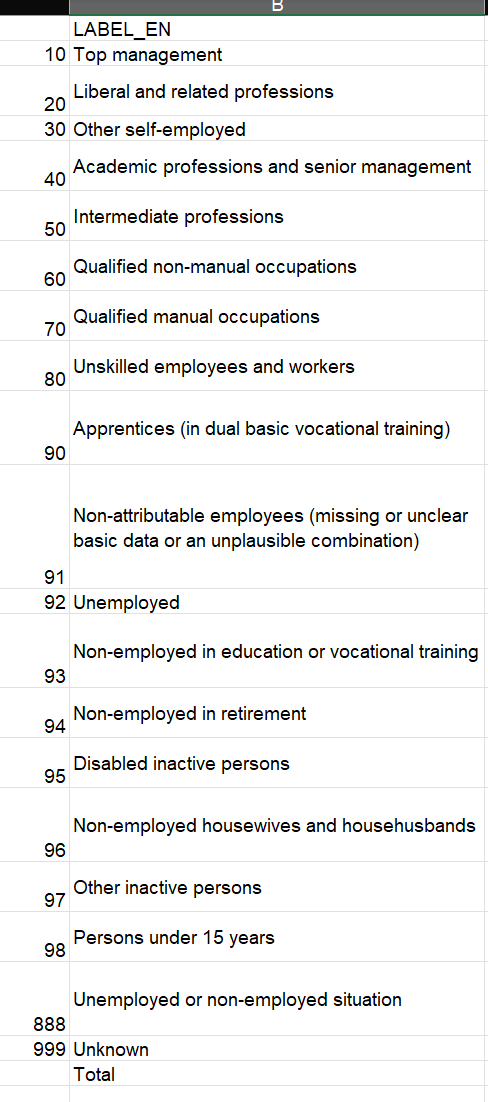

Legend of number of people by (highest) education level attained:

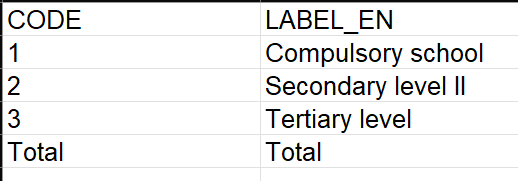

In [ ]:
labour = pd.read_csv(path + "labour.csv")
# Don't have data broken down to each sex and age range so just take the total
labour = labour[(labour['NATAGG'] == 'Total') & (labour['MIGR'] == 'Total') & (labour["AGE"] == "Total") & (labour["SEX"] == "Total")]
labour = labour.drop(columns=['NATAGG', 'MIGR', 'AGE', 'SEX'])
labour['GEO'] = labour['GEO'].replace(location_mapping)
labour = labour.rename(columns={'GEO': 'Canton', 'TIME_PERIOD' : 'Year'})

profession = labour[labour['SOCPROF'] != 'Total']
education = labour[labour['EDU'] != 'Total']

pivot_profession = profession.pivot_table(values='OBS_VALUE', index=['Year', 'Canton'], columns='SOCPROF', aggfunc='sum').reset_index()
pivot_edu = education.pivot_table(values='OBS_VALUE', index=['Year', 'Canton'], columns='EDU', aggfunc='sum').reset_index()

# Merge the profession and education DataFrames on 'TIME_PERIOD' and 'GEO'
labour = pd.merge(pivot_profession, pivot_edu, on=['Year', 'Canton'], suffixes=('_prof', '_edu'))
labour.head()

,Year,Canton,10,20,30,40,50,60,70,80,888,90,999,-9,1,2,3
0,2010,Aargau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3059400.0,40790.0,757092.0,1576944.0,684438.0
1,2010,Appenzell Ausserrhoden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264768.0,2629.0,73108.0,135606.0,52975.0
2,2010,Appenzell Innerrhoden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76747.0,0.0,22340.0,41996.0,11122.0
3,2010,Basel-Landschaft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389319.0,17939.0,312955.0,718452.0,339367.0
4,2010,Basel-Stadt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919432.0,20643.0,235094.0,372137.0,291105.0


## **Merging Data**

Here we merge all the different dataframes into one big dataframe X_data.

In [ ]:
# Marriages, Births, Divorces, Emigration, Immigration, Unemployment, GDP, GDP per capita, Labour
df1 = pd.merge(emigration, immigration, on=['Year', 'Canton', 'Age Group'], how='outer')
df1 = pd.merge(df1, births, on=['Year', 'Canton', 'Age Group'], how='left')
df1[['Births_Female', 'Births_Male']] = df1[['Births_Female', 'Births_Male']].fillna(0)
df1 = pd.merge(df1, marriages, on=['Year', 'Canton', 'Age Group'], how='inner')
df1 = pd.merge(df1, divorces, on=['Year', 'Canton', 'Age Group'], how='inner')
df2 = pd.merge(gdp, gdp_pc, on=['Year', 'Canton'], how='outer')
df2 = pd.merge(df2, unemployment_rate, on=['Year', 'Canton'], how='outer')
df2 = pd.merge(df2, labour, on=['Year', 'Canton'], how='outer')

X_data = pd.merge(df1, df2, on=['Year', 'Canton'], how='left')
X_data = X_data.drop('-9', axis=1)

X_data.tail(213)

,Year,Canton,Age Group,Emigration_Female,Emigration_Male,immigration_Female,immigration_Male,Births_Female,Births_Male,marriages,...,50,60,70,80,888,90,999,1,2,3
2491,2022,Zürich,40-49,1202,1945,2022,2961,699.0,700.0,523,...,1485420.0,846750.0,257095.0,288732.0,2716620.0,120938.0,81156.0,1342566.0,2926433.0,3605430.0
2492,2022,Zürich,50-59,1061,1356,1081,1403,8.0,9.0,353,...,1485420.0,846750.0,257095.0,288732.0,2716620.0,120938.0,81156.0,1342566.0,2926433.0,3605430.0
2493,2022,Zürich,60-69,787,1184,355,408,0.0,0.0,110,...,1485420.0,846750.0,257095.0,288732.0,2716620.0,120938.0,81156.0,1342566.0,2926433.0,3605430.0
2494,2022,Zürich,70-79,181,226,133,113,0.0,0.0,34,...,1485420.0,846750.0,257095.0,288732.0,2716620.0,120938.0,81156.0,1342566.0,2926433.0,3605430.0
2495,2022,Zürich,80-89,85,61,59,52,0.0,0.0,4,...,1485420.0,846750.0,257095.0,288732.0,2716620.0,120938.0,81156.0,1342566.0,2926433.0,3605430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,2023,Zürich,40-49,1268,1922,3241,3502,698.0,767.0,471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2700,2023,Zürich,50-59,1149,1329,1798,1649,7.0,9.0,244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2701,2023,Zürich,60-69,800,1292,947,668,0.0,0.0,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702,2023,Zürich,70-79,190,225,418,220,0.0,0.0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Shifting Years**

**Important Intuition**: Each feature data will be an input for the marriages of the next to next year. For instance, the feature data of 2015 determines the number of marriages in 2017 since we assume that marriages take time to "materizalize". To do so, we shift the rows of the Marriages column so that they are in the corresponding row of the 'year-2' year.

In [ ]:
X_data["marriages"] = X_data.groupby(["Canton", "Age Group"])["marriages"].shift(-2)

# Drop rows where Marriages_next_year is NaN (no next year data)
X_data = X_data.dropna(subset=["marriages"])
X_data = X_data.rename(columns={'marriages': 'marriages in Y+2'})
X_data[X_data['Canton'] == 'Aargau'].tail(50)

,Year,Canton,Age Group,Emigration_Female,Emigration_Male,immigration_Female,immigration_Male,Births_Female,Births_Male,marriages in Y+2,...,50,60,70,80,888,90,999,1,2,3
838,2015,Aargau,70-79,60,64,33,46,0.0,0.0,4.0,...,586260.0,505121.0,185609.0,155910.0,1136196.0,91686.0,115920.0,754369.0,1648949.0,878119.0
839,2015,Aargau,80-89,24,20,11,15,0.0,0.0,0.0,...,586260.0,505121.0,185609.0,155910.0,1136196.0,91686.0,115920.0,754369.0,1648949.0,878119.0
1040,2016,Aargau,10-19,159,180,404,703,13.0,14.0,5.0,...,592098.0,493103.0,194652.0,148813.0,1156375.0,91761.0,117942.0,733984.0,1665949.0,921246.0
1041,2016,Aargau,20-29,499,665,1492,2035,1072.0,1106.0,778.0,...,592098.0,493103.0,194652.0,148813.0,1156375.0,91761.0,117942.0,733984.0,1665949.0,921246.0
1042,2016,Aargau,30-39,521,827,1167,1629,2194.0,2224.0,911.0,...,592098.0,493103.0,194652.0,148813.0,1156375.0,91761.0,117942.0,733984.0,1665949.0,921246.0
1043,2016,Aargau,40-49,306,590,580,1037,169.0,186.0,181.0,...,592098.0,493103.0,194652.0,148813.0,1156375.0,91761.0,117942.0,733984.0,1665949.0,921246.0
1044,2016,Aargau,50-59,271,454,287,430,1.0,0.0,101.0,...,592098.0,493103.0,194652.0,148813.0,1156375.0,91761.0,117942.0,733984.0,1665949.0,921246.0
1045,2016,Aargau,60-69,197,326,84,109,0.0,0.0,22.0,...,592098.0,493103.0,194652.0,148813.0,1156375.0,91761.0,117942.0,733984.0,1665949.0,921246.0
1046,2016,Aargau,70-79,61,66,50,45,0.0,0.0,7.0,...,592098.0,493103.0,194652.0,148813.0,1156375.0,91761.0,117942.0,733984.0,1665949.0,921246.0
1047,2016,Aargau,80-89,30,16,13,13,0.0,0.0,0.0,...,592098.0,493103.0,194652.0,148813.0,1156375.0,91761.0,117942.0,733984.0,1665949.0,921246.0


In [ ]:
X_data.shape

(2288, 28)

## **Imputing Missing Values, Encoding, Scaling, and Splitting Data**

In [ ]:
missing_values = X_data.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

unemployment     48
10              832
20              832
30              832
40              832
50              832
60              832
70              832
80              832
888             832
90              832
dtype: int64


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

X = X_data.drop(columns=['marriages in Y+2', 'Year'], axis=1)
y = X_data['marriages in Y+2']

X['Canton_AgeGroup'] = X['Canton'] + "_" + X['Age Group']
X = X.drop(columns=['Canton', 'Age Group'])

# Separate numeric and categorical (combined) features
numeric_features = X.columns.difference(['Canton_AgeGroup'])
combined_feature = ['Canton_AgeGroup']

# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# Missing values
imputer = KNNImputer(n_neighbors=5)
X_train[numeric_features] = imputer.fit_transform(X_train[numeric_features])
X_test[numeric_features] = imputer.fit_transform(X_test[numeric_features])

# Encoding
X_train = pd.get_dummies(X_train, columns=['Canton_AgeGroup'], drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=['Canton_AgeGroup'], drop_first=True, dtype=int)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0) #Make sure they have the same amount of columns

# Scaling
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.fit_transform(X_test[numeric_features])

X_train.head()

,Emigration_Female,Emigration_Male,immigration_Female,immigration_Male,Births_Female,Births_Male,Divorces,GDP,GDP_pc,unemployment,...,Canton_AgeGroup_Zug_70-79,Canton_AgeGroup_Zug_80-89,Canton_AgeGroup_Zürich_10-19,Canton_AgeGroup_Zürich_20-29,Canton_AgeGroup_Zürich_30-39,Canton_AgeGroup_Zürich_40-49,Canton_AgeGroup_Zürich_50-59,Canton_AgeGroup_Zürich_60-69,Canton_AgeGroup_Zürich_70-79,Canton_AgeGroup_Zürich_80-89
1974,-0.478043,-0.530184,-0.458868,-0.491372,-0.360372,-0.36070,-0.526028,-0.357797,0.287367,2.117764,...,0,0,0,0,0,0,0,0,0,0
299,-0.192321,-0.012563,-0.143030,0.063336,-0.195292,-0.22051,1.257124,-0.050669,-0.486942,-0.775696,...,0,0,0,0,0,0,0,0,0,0
596,-0.241429,-0.166450,-0.183136,-0.051109,-0.360372,-0.36070,0.389323,-0.286347,-0.847860,0.227870,...,0,0,0,0,0,0,0,0,0,0
653,-0.382058,-0.322336,-0.418762,-0.438821,-0.360372,-0.36070,-0.252611,-0.207233,-0.253606,0.082494,...,0,0,0,0,0,0,0,0,0,0
1284,-0.085175,-0.020557,-0.221989,-0.199421,-0.360372,-0.36070,-0.086184,0.343494,3.857947,0.481106,...,0,0,0,0,0,0,0,0,0,0


**Preparing Training and Test Data Above**

1. **Spliting the data & selecting numeric features.**
2. **Scaling Data:** By scaling the data of the numeric data we prevent that features with large magnitudes dominate calculations like KNN. Additionally it helps achieve convergence in models like gradient descent and makes coefficients in models like linear regression easier to compare, as all features are on the same scale.

# **Building Models**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

data_range = X_data['marriages in Y+2'].max() - X_data['marriages in Y+2'].min()


def model_evaluation(y_test, y_pred):
  # Calculate RMSE on test data
  RMSE = mean_squared_error(y_test, y_pred, squared=False)
  print("RMSE Z-Scale:", RMSE)
  print("Range of marriages:", data_range)
  r2 = r2_score(y_test, y_pred)
  print("R-squared:", r2)

  # Plot the actual vs predicted values in the original scale
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, y_pred, alpha=0.5, s=10)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of equality

  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Actual vs. Predicted Values')
  plt.show()
  print(" ")
  errors_rf = y_test - y_pred
  plt.hist(errors_rf, bins=50)
  plt.xlabel('Prediction Error (Actual - Predicted)')
  plt.title('Distribution of Prediction Errors')
  plt.show()


## **Regression Models**

**Linear Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE Z-Scale: 35.943627721247466
Range of marriages: 2700.0
R-squared: 0.9792623665124086


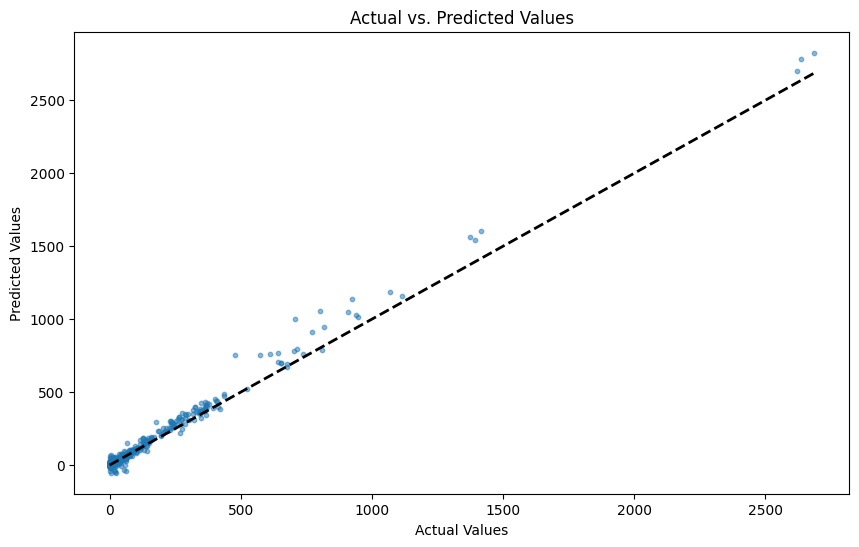

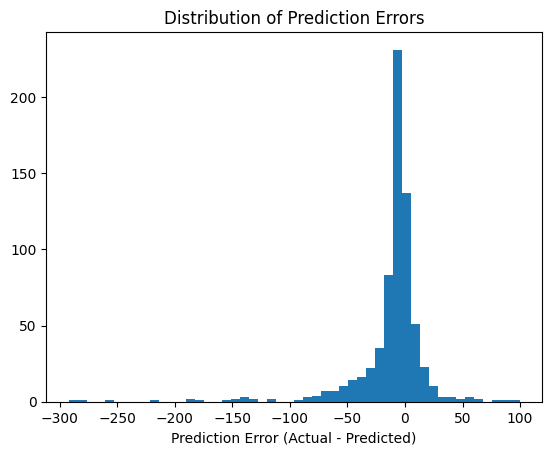

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# make prediction
y_pred = model.predict(X_test)

# Create a scatter plot of actual vs. predicted values
model_evaluation(y_test, y_pred)

In [ ]:
print("RMSE:", root_mean_squared_error(y_test, y_pred))

RMSE: 35.943627721247466


**Lasso Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.029e+05, tolerance: 9.959e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.183e+05, tolerance: 1.117e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.275e+05, tolerance: 1.070e

Best alpha: 0.0006951927961775605
RMSE Z-Scale: 37.55136999746832
Range of marriages: 2700.0
R-squared: 0.9773657060448535


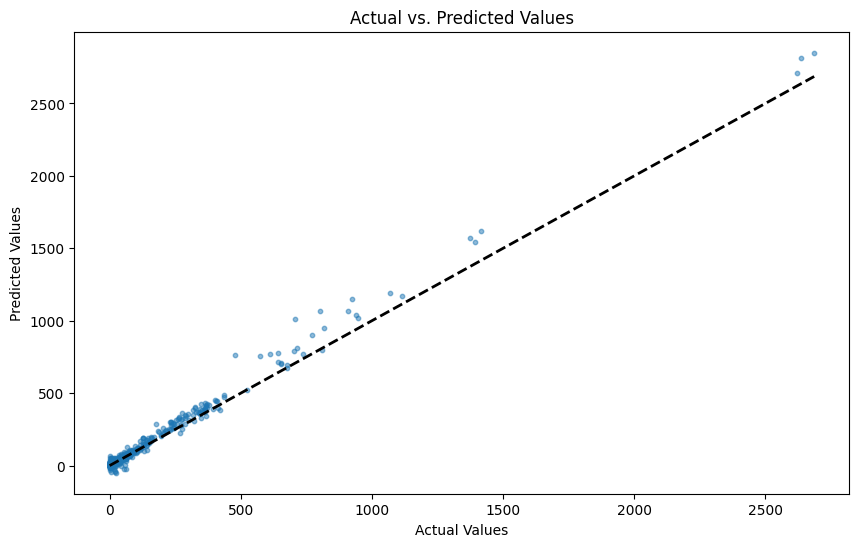

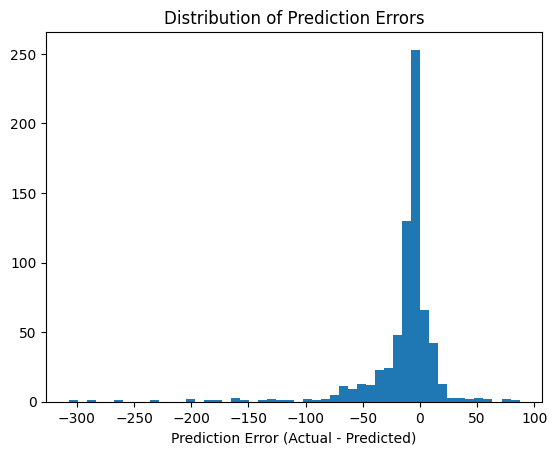

In [ ]:
# Lasso Regression with cross-validation and hyperparameter tuning
lasso = Lasso(max_iter=10000)
param_grid = {'alpha': np.logspace(-4, 4, 20)}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best alpha:", grid_search.best_params_['alpha'])

# Evaluate the model on test data
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(X_test)

model_evaluation(y_test, y_pred2)

In [ ]:
print("RMSE:", root_mean_squared_error(y_test, y_pred2))

RMSE: 37.55136999746832


**Ridge Regression**

Best alpha: 0.0018329807108324356
RMSE Z-Scale: 36.96132827749464
Range of marriages: 2700.0
R-squared: 0.9780714194879844


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


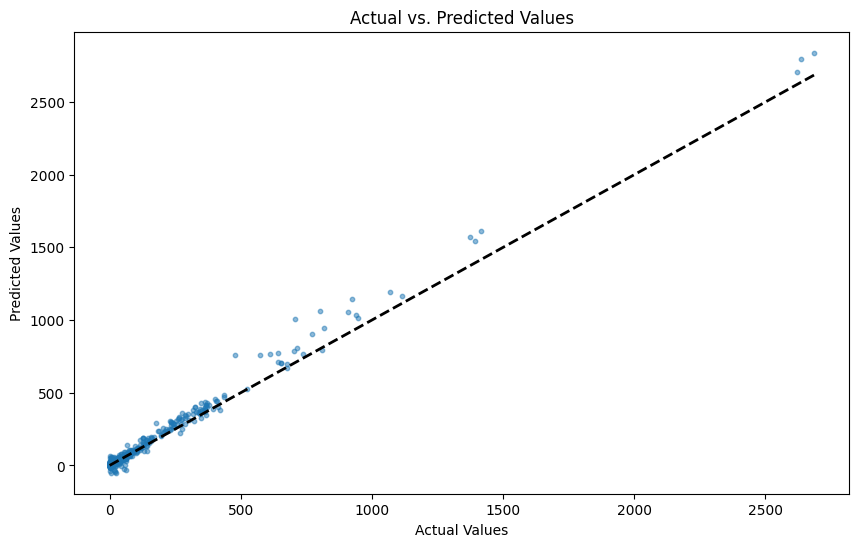

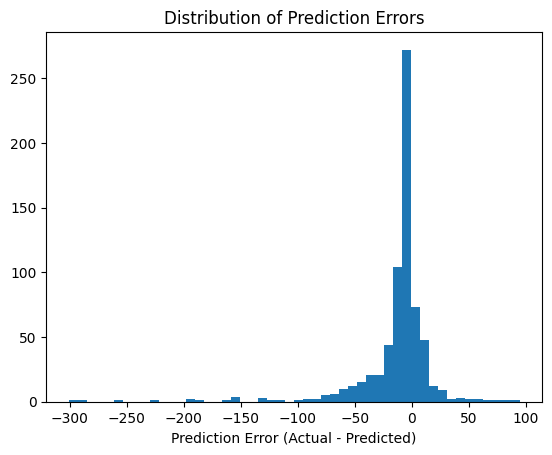

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
param_grid = {'alpha': np.logspace(-4, 4, 20)}  # Range of alpha values to test

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best alpha value found
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Use the best model to predict and evaluate RMSE
best_model = grid_search.best_estimator_
y_pred3 = best_model.predict(X_test)

model_evaluation(y_test, y_pred3)

In [ ]:
print("RMSE:", root_mean_squared_error(y_test, y_pred3))

RMSE: 36.96132827749464


# **Investigating Correlations and R2 Values**

Before proceeding with other models, we wanted to investigate possible reasons as to why our R2 values appear so high.

In [ ]:
import numpy as np

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your DataFrame of independent variables (X)
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

                          feature          VIF
0               Emigration_Female   319.010384
1                 Emigration_Male   346.242180
2              immigration_Female   429.851742
3                immigration_Male   373.211730
4                   Births_Female  1006.604499
..                            ...          ...
226  Canton_AgeGroup_Zürich_40-49    97.233421
227  Canton_AgeGroup_Zürich_50-59    88.750552
228  Canton_AgeGroup_Zürich_60-69    72.660552
229  Canton_AgeGroup_Zürich_70-79    61.664896
230  Canton_AgeGroup_Zürich_80-89    60.190640

[231 rows x 2 columns]


Above code adapted from Open AI, 2024.

In [ ]:
specific_feature = 'Births_Male'
vif_for_feature = vif_data[vif_data['feature'] == specific_feature]

print(vif_for_feature)

       feature          VIF
5  Births_Male  1060.903735


In [ ]:
correlation_matrix = X_train.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                              Emigration_Female  Emigration_Male  \
Emigration_Female                      1.000000         0.973384   
Emigration_Male                        0.973384         1.000000   
immigration_Female                     0.959171         0.934867   
immigration_Male                       0.946079         0.956152   
Births_Female                          0.692026         0.736795   
...                                         ...              ...   
Canton_AgeGroup_Zürich_40-49           0.150225         0.228080   
Canton_AgeGroup_Zürich_50-59           0.106474         0.141747   
Canton_AgeGroup_Zürich_60-69           0.048361         0.083697   
Canton_AgeGroup_Zürich_70-79          -0.011815        -0.010614   
Canton_AgeGroup_Zürich_80-89          -0.024579        -0.030102   

                              immigration_Female  immigration_Male  \
Emigration_Female                       0.959171          0.946079   
Emigration_Male        

**Evaluation and Further Steps**

Despite having very high R2 values on first impression, we noticed that there was some multicollinearity present as well as features with high VIF (variance inflation factor) values. A high VIF indicates a high degree of correlation between one feature and other features in the dataset. In our case, some VIF values are very high, such as Births_Female with a VIF of 1006 and Births_Male with a VIF of 1060. Features like Emigration_Female, Emigration_Male, and Immigration_Female also have high VIF values, ranging from 319 to 429. Additionally, the correlation matrix demonstrates evidence of multicollinearity. There is near-perfect correlation between:

Births_Female and Births_Male (0.999), Immigration_Female and Immigration_Male (0.985), and Emigration_Female and Emigration_Male (0.973), as well as moderate to high correlation between features like Births_Female and Immigration_Female (0.731). These correlations amplify redundancy, where one feature can predict others almost perfectly.

**Impact on R2 Values in the Models**

We reasoned that high R² values, especially values close to 0.99, could be artificially inflated due to multicollinearity. High correlation between features causes the model to "learn" redundant relationships, allowing the model to attribute the same variance in the target variable to multiple features, leading to an overestimation of explanatory power. High multicollinearity also causes the model to capture noise in the data, inflating R2 without improving generalisability.

Henceforth, we created a new file "Final Version (Clean) Marriages.ipynb" including the updated data handling, more models, and a more critical evaluation of the results.

**Consequences**

Besides inflated R2 scores, high VIF values result in unstable coefficients, meaning that small changes in the data can lead to large fluctuations in coefficients. Multicollinearity also increases the risk of overfitting, which we want to avoid.

**Changes to Approach in New File**

Below are the changes to our approach acknowledging the above limitations of our model in this (first version) file:

- Removed features that were involved in high VIF value/multicollinearity issues (such as GDP, labour etc.).
- Combined certain features for same reason as above. Turned all emigrations and immigrations into a 'Net Migration' feature for specific age groups with positive values indicating inflows into a canton (without differentiating for males/females). Also combined male and female births into (total) Births feature. This follows from intuition, since generally, by biological probabilities, the amount of males and females born are relatively even. Thus, many male births would imply many female births and vice versa.
- To increase the reliability of the model, we wanted to increase the number of data points used to train and test the model. In this file, we only used data from 2011 onwards (since that was the only similar year for all features). However, by extrapolating GDP per capita and cantonal unemployment rates back to 1981, we found 1981 to be a suitable similar year for all features and hence used this as the starting year.
- Increased the number and quality of models used for prediction purposes.

**References**

1. DeepL SE. (2024). DeepL translator – The world's most accurate translator. DeepL. https://www.deepl.com/translator

2. OpenAI. (2024). ChatGPT (December 9 version) [Large language Model]. https://chatgpt.com/